# Introduction

Bike-sharing systems are a modern twist on bike rentals, with everything automated from sign-up to return. Users can easily grab a bike at one spot and drop it off at another. They're becoming popular because they help with traffic, the environment, and health.

This dataset offers key details about bike rentals, including factors like date and time, weather, and holidays. It provides hourly rental data over a two-year period. For this competition, the training set includes data from the first 19 days of each month, while the test set covers the 20th to the end of the month.

This project uses regression algorithms to predict the hourly bike rental counts in the test set based on prior data. We'll evaluate models using the Root Mean Squared Logarithmic Error (RMSLE) to choose the most accurate one.

### Features :

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| season        | 1 = Winter, 2 = Spring, 3 = Summer, 4 = autumn                                                              |
| holiday       | 1 = holiday, 0 = not holiday                                                                                |
| workingday    | 1 = working day, 0 = not working day                                                                        |
| weather       | 1 = Clear, 2 = Cloudy, Mist, 3 = Snow,4 = Heavy Rain                                                        |
| temp          | temperature in Celsius                                                                                      |
| atemp         | "feels like" temperature in Celsius                                                                         |
| floowindspeedr| wind speed                                                                                                  |
| casual        | number of non-registered user rentals initiated                                                             |
| registered    | number of registered user rental initiated                                                                  |
| count         | number of total rentals                                                                                     |

In [2]:
# Import libraries.


import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_log_error, make_scorer
from sklearn.linear_model import LinearRegression  
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor

In [4]:
# Load tha train data.
train = pd.read_csv("train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [27]:
train.shape

(10886, 12)

In [5]:
# Load tha test data.
test = pd.read_csv("test.csv")
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
test.shape

(6493, 9)

# preparation the train data

In [7]:
# Seeing if there are dublicated.
train.duplicated().sum()

0

In [8]:
# seeing if there are null values.
train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [13]:
# Seeing information about data.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [9]:
# Convert the 'datetime' column to datetime format
train['datetime'] = pd.to_datetime(train['datetime'], format = '%Y-%m-%d %H:%M:%S')

In [10]:
train['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [11]:
# Seeing information about data.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [12]:
# Extract the year from the 'datetime' column and create a new 'year' column
train['year'] = train['datetime'].dt.year

# Extract the month as its name from the 'datetime' column and create a new 'month' column
train['month'] = train['datetime'].dt.month_name()

# Extract the day as its name from the 'datetime' column and create a new 'day' column
train['day'] = train['datetime'].dt.day_name()

# Extract the hour from the 'datetime' column and create a new 'hour' column
train['hour'] = train['datetime'].dt.hour

train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,January,Saturday,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,January,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,January,Saturday,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,January,Saturday,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,January,Saturday,4
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,January,Saturday,5
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,January,Saturday,6
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,January,Saturday,7
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011,January,Saturday,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011,January,Saturday,9


In [13]:
# Replace the values in the 'season' column with corresponding strings
train['season'].replace({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'}, inplace=True)

# Replace the values in the 'holiday' column with corresponding strings
train['holiday'].replace({1: 'Holiday', 0: 'Not Holiday'}, inplace=True)

# Replace the values in the 'workingday' column with corresponding strings
train['workingday'].replace({1: 'Workingday', 0: 'Not Workingday'}, inplace=True)

# Replace the values in the 'weather' column with corresponding strings
train['weather'].replace({1: 'Clear', 2: 'Cloudy', 3: 'Rain', 4: 'Snow'}, inplace=True)

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,Winter,Not Holiday,Not Workingday,Clear,9.84,14.395,81,0.0,3,13,16,2011,January,Saturday,0
1,2011-01-01 01:00:00,Winter,Not Holiday,Not Workingday,Clear,9.02,13.635,80,0.0,8,32,40,2011,January,Saturday,1
2,2011-01-01 02:00:00,Winter,Not Holiday,Not Workingday,Clear,9.02,13.635,80,0.0,5,27,32,2011,January,Saturday,2
3,2011-01-01 03:00:00,Winter,Not Holiday,Not Workingday,Clear,9.84,14.395,75,0.0,3,10,13,2011,January,Saturday,3
4,2011-01-01 04:00:00,Winter,Not Holiday,Not Workingday,Clear,9.84,14.395,75,0.0,0,1,1,2011,January,Saturday,4


In [14]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
dtype: int64

In [19]:
# Categorical columns.
cat_features = train[['season', 'holiday', 'workingday', 'weather',  'year', 'month', 'day', 'hour']]

for i in cat_features:
    print(train[i].value_counts())
    print('-' * 50)

season
Autumn    2734
Spring    2733
Summer    2733
Winter    2686
Name: count, dtype: int64
--------------------------------------------------
holiday
Not Holiday    10575
Holiday          311
Name: count, dtype: int64
--------------------------------------------------
workingday
Workingday        7412
Not Workingday    3474
Name: count, dtype: int64
--------------------------------------------------
weather
Clear     7192
Cloudy    2834
Rain       860
Name: count, dtype: int64
--------------------------------------------------
year
2012    5464
2011    5422
Name: count, dtype: int64
--------------------------------------------------
month
May          912
June         912
July         912
August       912
December     912
October      911
November     911
April        909
September    909
February     901
March        901
January      884
Name: count, dtype: int64
--------------------------------------------------
day
Saturday     1584
Sunday       1579
Thursday     1553
Monday      

We've discerned two observations:

First, the single value for 'snow' could negatively impact our analysis, so we combined it with 'rain' in the same column.

Second, we noticed a mismatch between 'holiday' and 'not-workingday.' Since 'workingday' refers to days that are neither weekends nor holidays, we added a 'weekend' variable to capture days when work or vacation isn't in effect. This clarifies that 'holiday' refers only to public holidays, not weekends.

In [16]:
# Define a mapping dictionary to combine the clusters
cluster_mapping = {"Snow" : "Rain"}

# Update the "grade" column with the new cluster labels
train['weather'] = train['weather'].replace(cluster_mapping)

# Check the value_counts for the weather after replacing
train['weather'].value_counts()

weather
Clear     7192
Cloudy    2834
Rain       860
Name: count, dtype: int64

In [17]:
# Filter rows where 'workingday' is equal to 'Workingday'
workingDay = train[train['workingday'] == 'Workingday']

# Filter rows where 'holiday' is equal to 'Holiday'
holiDay = train[train['holiday'] == 'Holiday']

# Filter rows where 'holiday' is not 'Holiday' and 'workingday' is not 'Workingday'
weekEnd = train[(train['holiday'] == 'Not Holiday') & (train['workingday'] == 'Not Workingday')]

In [20]:
cat_features.describe(include='all')

,season,holiday,workingday,weather,year,month,day,hour
count,10886,10886,10886,10886,10886.000000,10886,10886,10886.000000
unique,4,2,2,3,NaN,12,7,NaN
top,Autumn,Not Holiday,Workingday,Clear,NaN,May,Saturday,NaN
freq,2734,10575,7412,7192,NaN,912,1584,NaN
mean,NaN,NaN,NaN,NaN,2011.501929,NaN,NaN,11.541613
std,NaN,NaN,NaN,NaN,0.500019,NaN,NaN,6.915838
min,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN,6.000000
50%,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN,12.000000
75%,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN,18.000000


In [21]:
# Num columns.
num_features = train[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']]

# calculate descriptive statistics for numerical values.
num_features.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Noticebly some features like humidity and windspeed has 0 as min value. let's dig into it and see what are the reasons: 

In [22]:
# Get the count of the minimum value
count_of_min_value = train[train['humidity']==0].shape[0]

count_of_min_value

22

In [23]:
# Filter rows with the minimum value
min_value_rows = train[train['humidity'] == 0]
min_value_rows

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
1091,2011-03-10 00:00:00,Winter,Not Holiday,Workingday,Rain,13.94,15.910,0,16.9979,3,0,3,2011,March,Thursday,0
1092,2011-03-10 01:00:00,Winter,Not Holiday,Workingday,Rain,13.94,15.910,0,16.9979,0,2,2,2011,March,Thursday,1
1093,2011-03-10 02:00:00,Winter,Not Holiday,Workingday,Rain,13.94,15.910,0,16.9979,0,1,1,2011,March,Thursday,2
1094,2011-03-10 05:00:00,Winter,Not Holiday,Workingday,Rain,14.76,17.425,0,12.9980,1,2,3,2011,March,Thursday,5
1095,2011-03-10 06:00:00,Winter,Not Holiday,Workingday,Rain,14.76,16.665,0,22.0028,0,12,12,2011,March,Thursday,6
1096,2011-03-10 07:00:00,Winter,Not Holiday,Workingday,Rain,15.58,19.695,0,15.0013,1,36,37,2011,March,Thursday,7
1097,2011-03-10 08:00:00,Winter,Not Holiday,Workingday,Rain,15.58,19.695,0,19.0012,1,43,44,2011,March,Thursday,8
1098,2011-03-10 09:00:00,Winter,Not Holiday,Workingday,Rain,16.40,20.455,0,15.0013,1,23,24,2011,March,Thursday,9
1099,2011-03-10 10:00:00,Winter,Not Holiday,Workingday,Rain,16.40,20.455,0,11.0014,0,17,17,2011,March,Thursday,10
1100,2011-03-10 11:00:00,Winter,Not Holiday,Workingday,Rain,16.40,20.455,0,16.9979,6,5,11,2011,March,Thursday,11


We noticed 22 instances of zero humidity, all on the same day, which seems like a recording glitch.

To fix it, we filled in those zeros with the average humidity for rainy days since it was mostly rainy. This way, the data stays consistent and accurate, even with the hiccup.

In [24]:
# Filter rows where the weather is 'Rain'
rain_weather = train[train['weather'] == 'Rain']

# Calculate the mean humidity for rows with 'Rain' weather
mean_rain_weather_humidity = rain_weather['humidity'].mean()

# Replace 0 values in the 'humidity' column with the calculated mean for 'Rain' weather
train['humidity'] = train['humidity'].replace(0, mean_rain_weather_humidity)

# Check the minimum value in the 'humidity' column after replacing 0 values
train['humidity'].min()

8.0

In [25]:
# Get the count of the minimum value
count_of_min_value = train[train['windspeed']==0].shape[0]
count_of_min_value

1313

In [26]:
# Filter rows with the minimum value
min_value_rows = train[train['windspeed'] == 0]

min_value_rows.sample(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
1948,2011-05-08 02:00:00,Spring,Not Holiday,Not Workingday,Clear,19.68,23.485,63.0,0.0,17,42,59,2011,May,Sunday,2
7847,2012-06-07 08:00:00,Spring,Not Holiday,Workingday,Clear,21.32,25.000,77.0,0.0,20,661,681,2012,June,Thursday,8
5537,2012-01-05 20:00:00,Winter,Not Holiday,Workingday,Clear,12.30,16.665,49.0,0.0,5,172,177,2012,January,Thursday,20
4355,2011-10-13 12:00:00,Autumn,Not Holiday,Workingday,Cloudy,25.42,28.030,88.0,0.0,10,95,105,2011,October,Thursday,12
1972,2011-05-09 02:00:00,Spring,Not Holiday,Workingday,Clear,18.04,21.970,94.0,0.0,6,2,8,2011,May,Monday,2
3484,2011-08-15 02:00:00,Summer,Not Holiday,Workingday,Cloudy,24.60,28.030,83.0,0.0,0,3,3,2011,August,Monday,2
8252,2012-07-05 05:00:00,Summer,Not Holiday,Workingday,Clear,29.52,34.090,62.0,0.0,1,28,29,2012,July,Thursday,5
9320,2012-09-11 17:00:00,Summer,Not Holiday,Workingday,Clear,28.70,31.820,28.0,0.0,168,802,970,2012,September,Tuesday,17
9082,2012-09-01 19:00:00,Summer,Not Holiday,Not Workingday,Rain,31.98,37.120,62.0,0.0,157,235,392,2012,September,Saturday,19
2031,2011-05-11 13:00:00,Spring,Not Holiday,Workingday,Clear,25.42,31.060,50.0,0.0,36,157,193,2011,May,Wednesday,13


We found 1,313 instances of zero wind speed scattered throughout the dataset.
To fix this, we’re replacing those zeros with nearby the below values as they are for the same day. 

In [27]:
# Replace zero 'windspeed with the values above or below
train['windspeed'] = train['windspeed'].replace(0, method='ffill').replace(0, method='bfill')

# Check the minimum value in the 'windspeed' column after replacing 0 values
train['windspeed'].min()

/var/folders/t8/b35g9qgj44lc2lk1cvtblc5w0000gp/T/ipykernel_84832/1292518881.py:2: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  train['windspeed'] = train['windspeed'].replace(0, method='ffill').replace(0, method='bfill')


6.0032

# Data Visualiation and Analysis

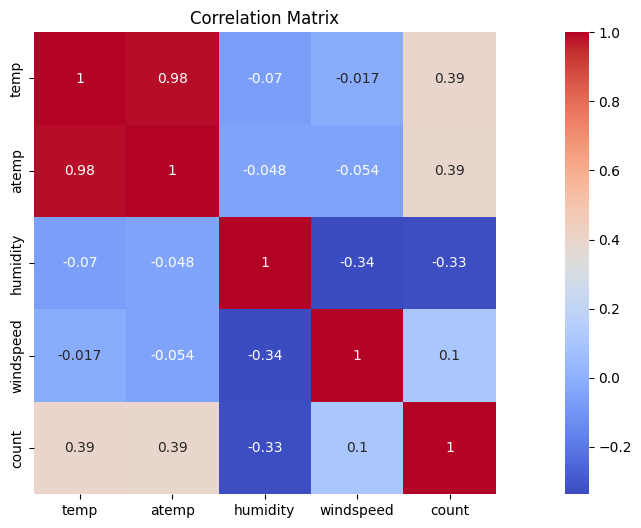

In [47]:
# Calculate the correlation matrix between numerical features 
correlation_matrix = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

plt.figure(figsize=(18, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


As we have seen in the above graph,

1- There is a high correlation between the 'temp' column and the 'atemp' column, so we remove one of them because the two feature act as one feature

2- There is a week positive correlation between the 'temp' column and the target 'count' (0.39), a week negative correlation between the 'humidity' column and the target (-0.32), but there is no correlation between windspeed and the target (0.1).

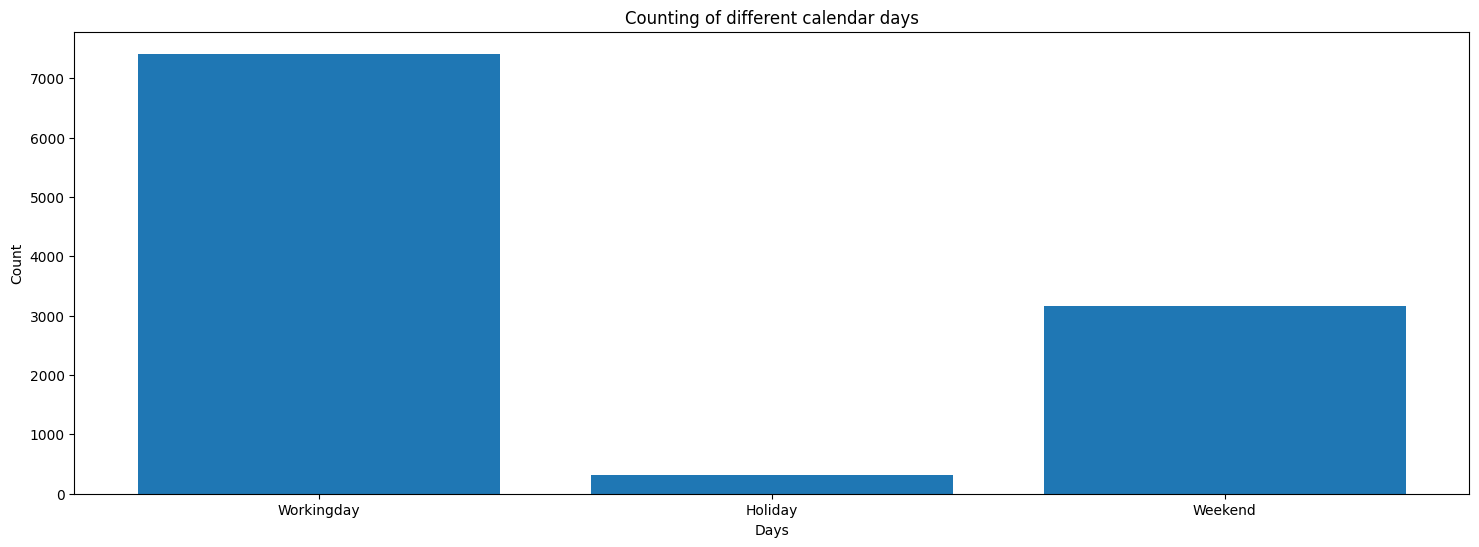

In [51]:
# Calculate counts
counts = [workingDay.shape[0], holiDay.shape[0], weekEnd.shape[0]]
labels = ['Workingday', 'Holiday', 'Weekend']

# Create a bar chart
plt.figure(figsize=(18, 6))
plt.bar(labels, counts)
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Counting of different calendar days')
plt.show()

/var/folders/t8/b35g9qgj44lc2lk1cvtblc5w0000gp/T/ipykernel_84832/502254517.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),  horizontalalignment='right')


[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

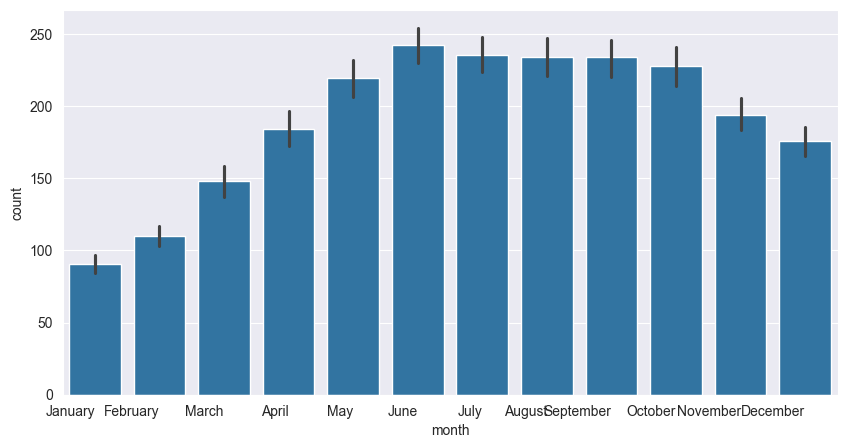

In [28]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
chart = sns.barplot(x = train['month'], y = train['count'])
chart.set_xticklabels(chart.get_xticklabels(),  horizontalalignment='right')

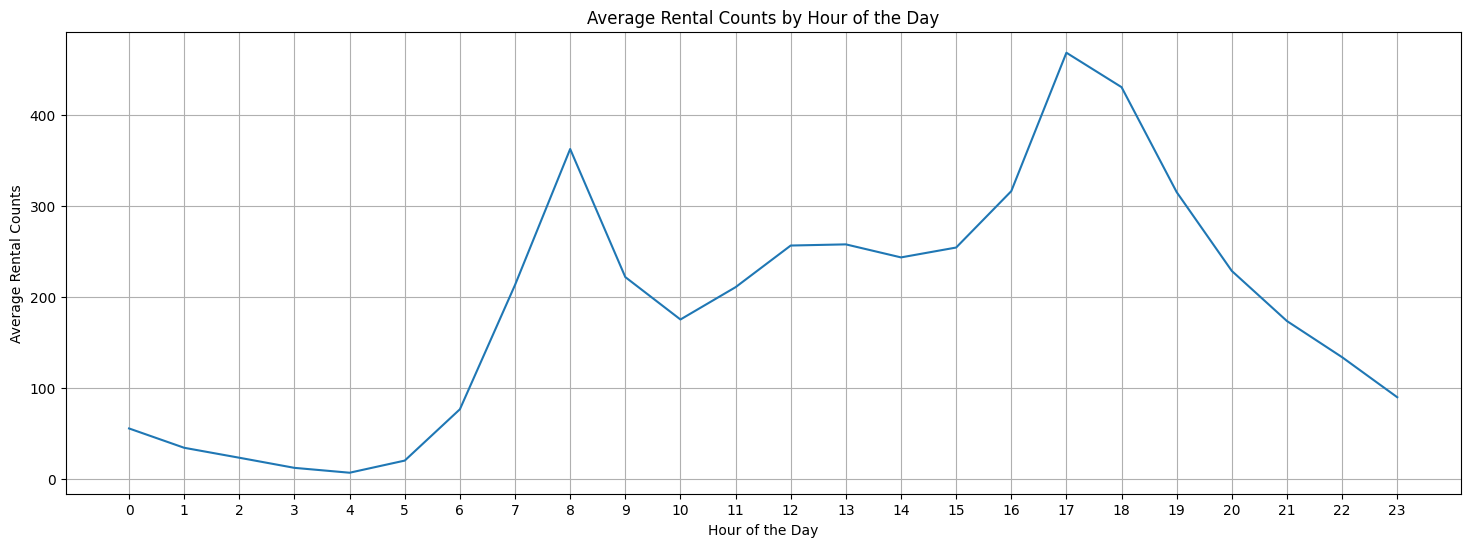

In [52]:
# Calculate the average rental counts by hour of the day
hourly_counts = train.groupby('hour')['count'].mean().reset_index()

# Create a line plot to visualize the average rental counts by hour
plt.figure(figsize=(18, 6))
sns.lineplot(x='hour', y='count', data=hourly_counts)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rental Counts')
plt.title('Average Rental Counts by Hour of the Day')
plt.xticks(ticks=range(24), labels=range(24))
plt.grid()
plt.show()

Text(0, 0.5, 'Mean Count')

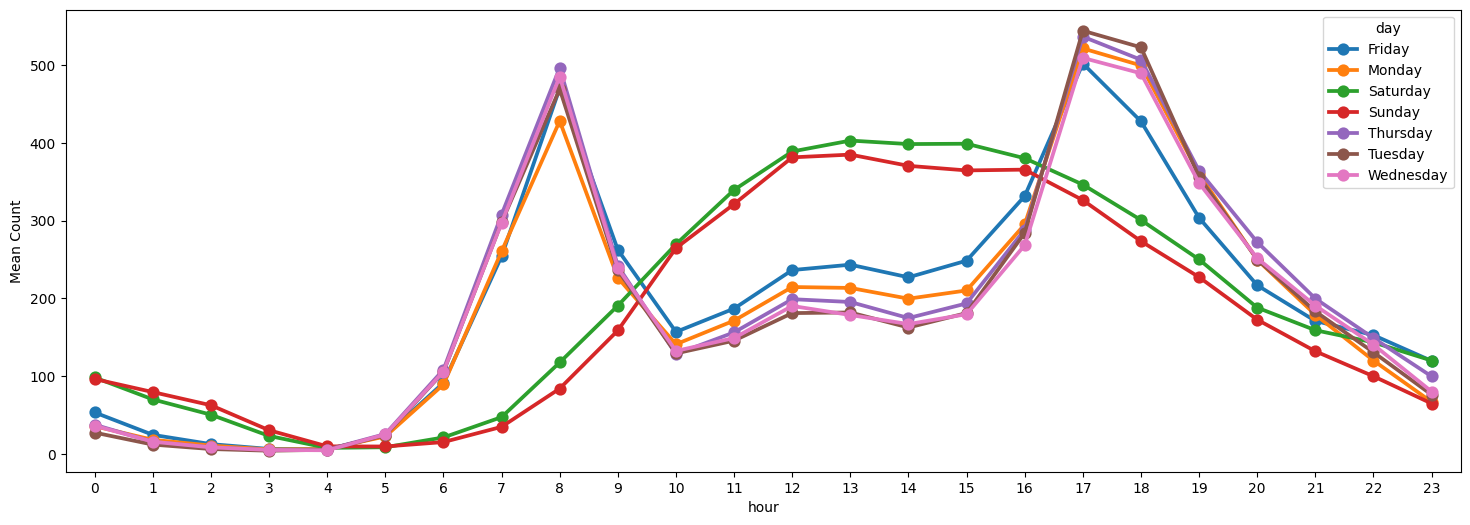

In [55]:
# Plot the mean rental counts per hour based on day of the week
plt.figure(figsize=(18, 6))
ax1 = sns.pointplot(x=hour_day_df["hour"], y=hour_day_df["count"], hue=hour_day_df["day"])
ax1.set_ylabel("Mean Count")

In [56]:
# Extracting unique days from the 'day' column of the 'weekEnd' DataFrame
weekEnd['day'].unique()

array(['Saturday', 'Sunday'], dtype=object)

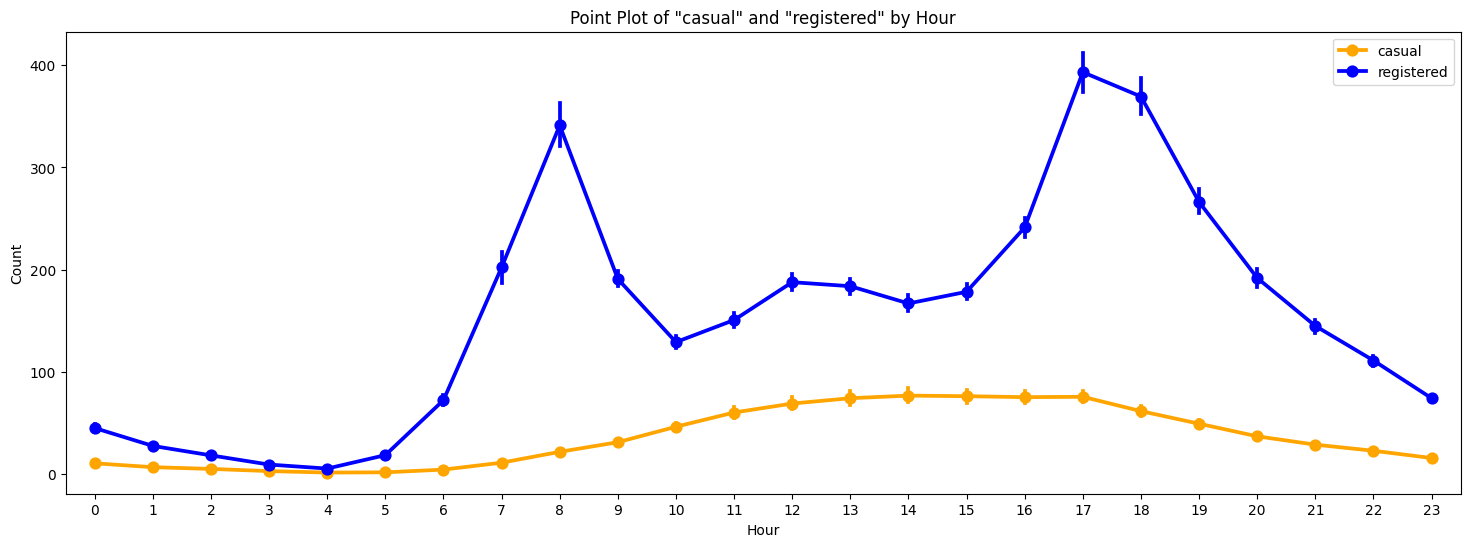

In [57]:
# Set up the plot
plt.figure(figsize=(18, 6))

# Create a point plot for 'casual' and 'registered' by 'hour'
sns.pointplot(data=train, x='hour', y='casual', color='orange', label='casual')
sns.pointplot(data=train, x='hour', y='registered', color='blue', label='registered')

plt.title('Point Plot of "casual" and "registered" by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend()

plt.show()


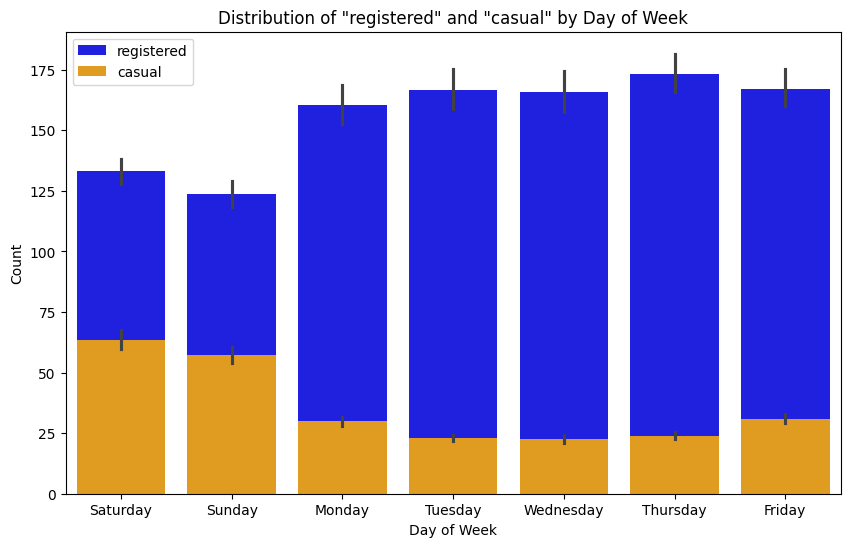

In [58]:
# Set up the plot
plt.figure(figsize=(10, 6))

# Create a bar plot to visualize distribution of 'registered' and 'casual' by 'day'
sns.barplot(data=train, x='day', y='registered', color='blue', label='registered')
sns.barplot(data=train, x='day', y='casual', color='orange', label='casual')

plt.title('Distribution of "registered" and "casual" by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.legend()

plt.show()


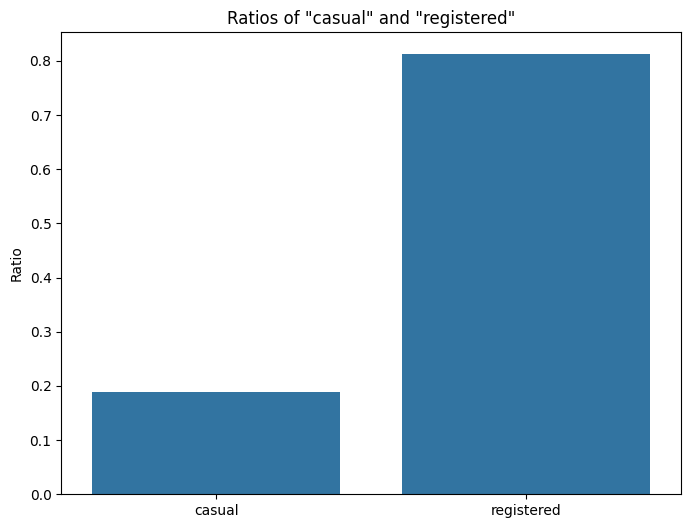

In [59]:
# Calculate the total counts for 'casual' and 'registered'
total_casual = train['casual'].sum()
total_registered = train['registered'].sum()

# Calculate the ratios
ratio_casual = total_casual / (total_casual + total_registered)
ratio_registered = total_registered / (total_casual + total_registered)

# Create a bar plot for the ratios of 'casual' and 'registered'
ratios = [ratio_casual, ratio_registered]
labels = ['casual', 'registered']

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=ratios)
plt.title('Ratios of "casual" and "registered"')
plt.ylabel('Ratio')
plt.show()

Text(0, 0.5, 'Mean Count')

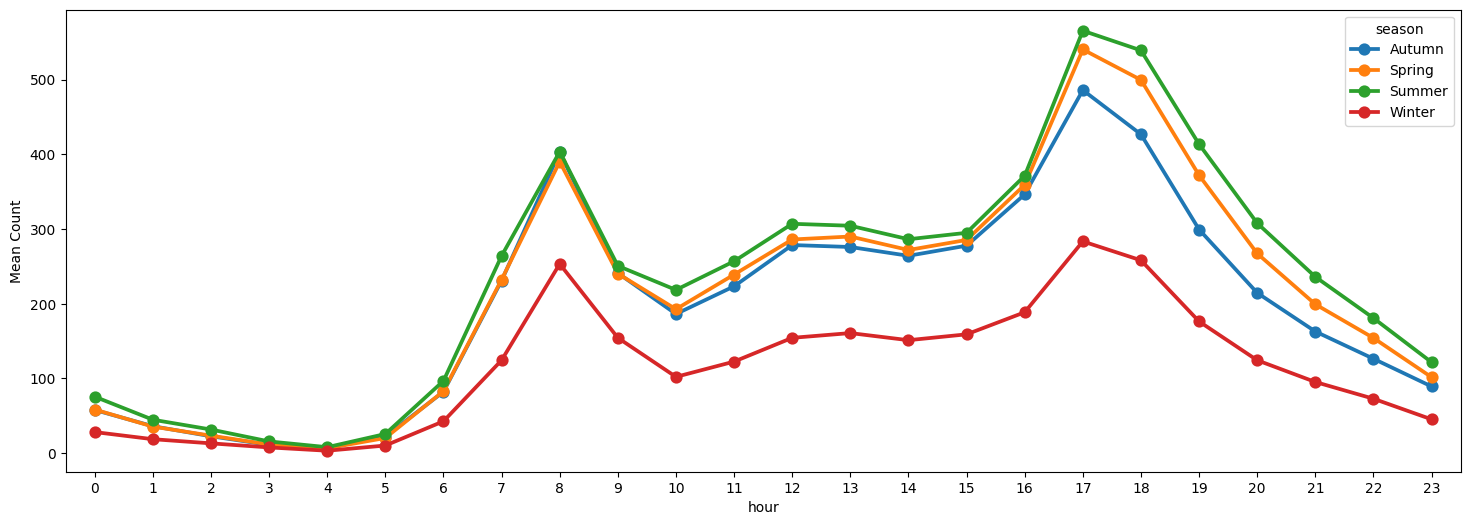

In [60]:
# Plot the mean rental counts per hour based on season
plt.figure(figsize=(18, 6))
hour_season_df = train.groupby(["hour", "season"])["count"].mean().to_frame().reset_index()
ax2 = sns.pointplot(x=hour_season_df["hour"], y=hour_season_df["count"], hue=hour_season_df["season"])
ax2.set_ylabel("Mean Count")


It's evident that peak hours for bike rentals remain consistent across seasons, likely due to work-related commuting patterns that persist regardless of the time of year. 

Interestingly, despite the consistent peak hour trend, spring stands out with lower bike rental counts. This divergence could be attributed to the prevalence of official holidays during the spring months.

In [61]:
# Count the occurrences of each season in the 'season' column of the 'holiDay' DataFrame
holiDay['season'].value_counts()

season
Summer    96
Autumn    96
Winter    71
Spring    48
Name: count, dtype: int64

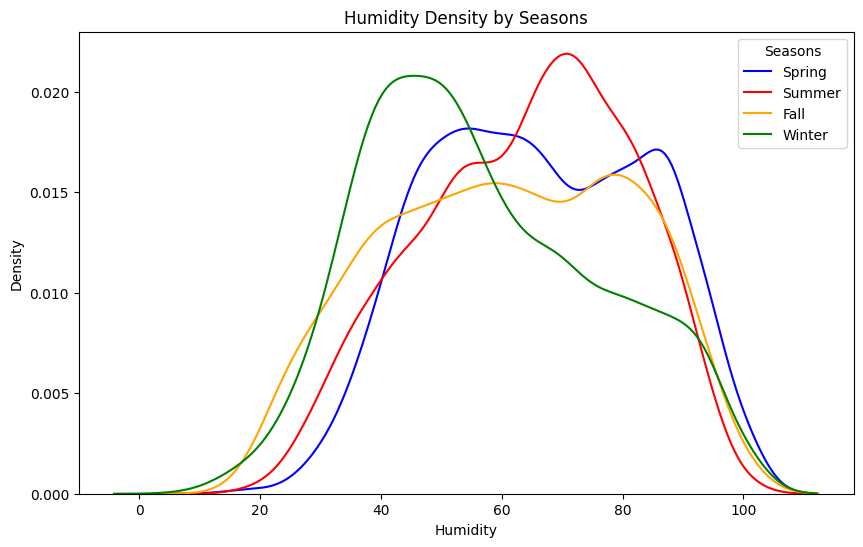

In [62]:
# Define custom colors for each season
season_colors = {
    'Spring': 'green',
    'Summer': 'orange',
    'Fall': 'red',
    'Winter': 'blue'
}

# Set up the plot
plt.figure(figsize=(10, 6))

# Create a kernel density plot of humidity by season with custom colors
sns.kdeplot(data=train, x='humidity', hue='season', common_norm=False, palette=season_colors.values())
plt.title('Humidity Density by Seasons')
plt.xlabel('Humidity')
plt.ylabel('Density')
plt.legend(title='Seasons', labels=season_colors.keys())

plt.show()

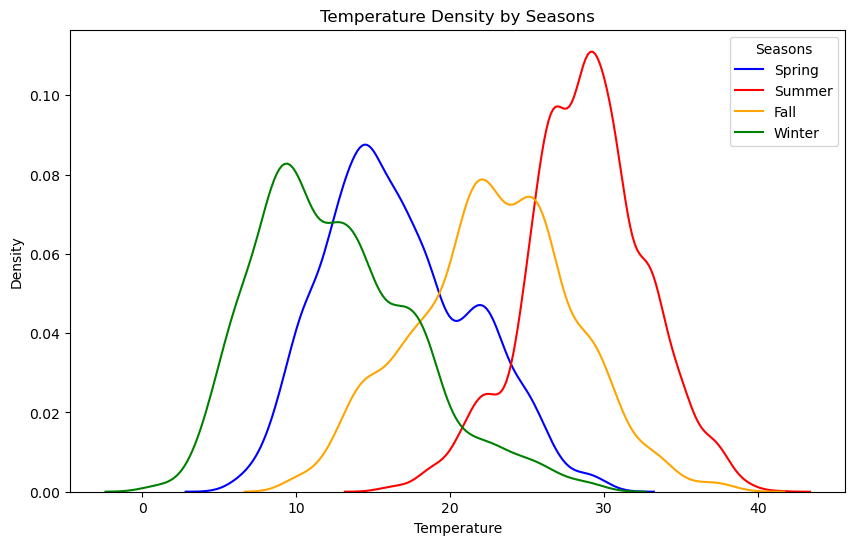

In [34]:
# Define custom colors for each season
season_colors = {
    'Spring': 'green',
    'Summer': 'orange',
    'Fall': 'red',
    'Winter': 'blue'
}

# Set up the plot
plt.figure(figsize=(10, 6))

# Create a kernel density plot of temperature by season with custom colors
sns.kdeplot(data=train, x='temp', hue='season', common_norm=False, palette=season_colors.values())
plt.title('Temperature Density by Seasons')
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.legend(title='Seasons', labels=season_colors.keys())

plt.show()

In [63]:
# Calculate the number of days in each season
days_in_season = train['season'].value_counts().sort_index()

# Display the number of days in each season
print("Number of days in each season:")
print(days_in_season)

Number of days in each season:
season
Autumn    2734
Spring    2733
Summer    2733
Winter    2686
Name: count, dtype: int64


<Axes: ylabel='count'>

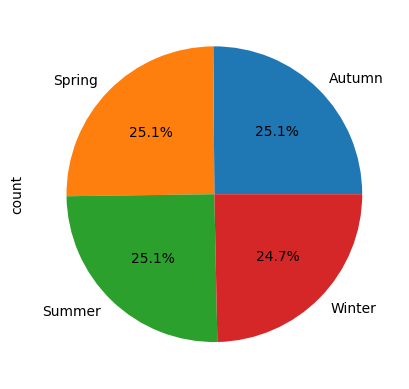

In [64]:
# Seeing the distribution of 'season' values in the train dataset
train['season'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')

The distribution of data appears remarkably balanced across seasons. These factors remain concealed, prompting a need for further exploration to uncover potential underlying causes responsible for this particular trend in the spring season.

/var/folders/t8/b35g9qgj44lc2lk1cvtblc5w0000gp/T/ipykernel_84832/3717952619.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')


[Text(0, 0, 'Clear'), Text(1, 0, 'Cloudy'), Text(2, 0, 'Rain')]

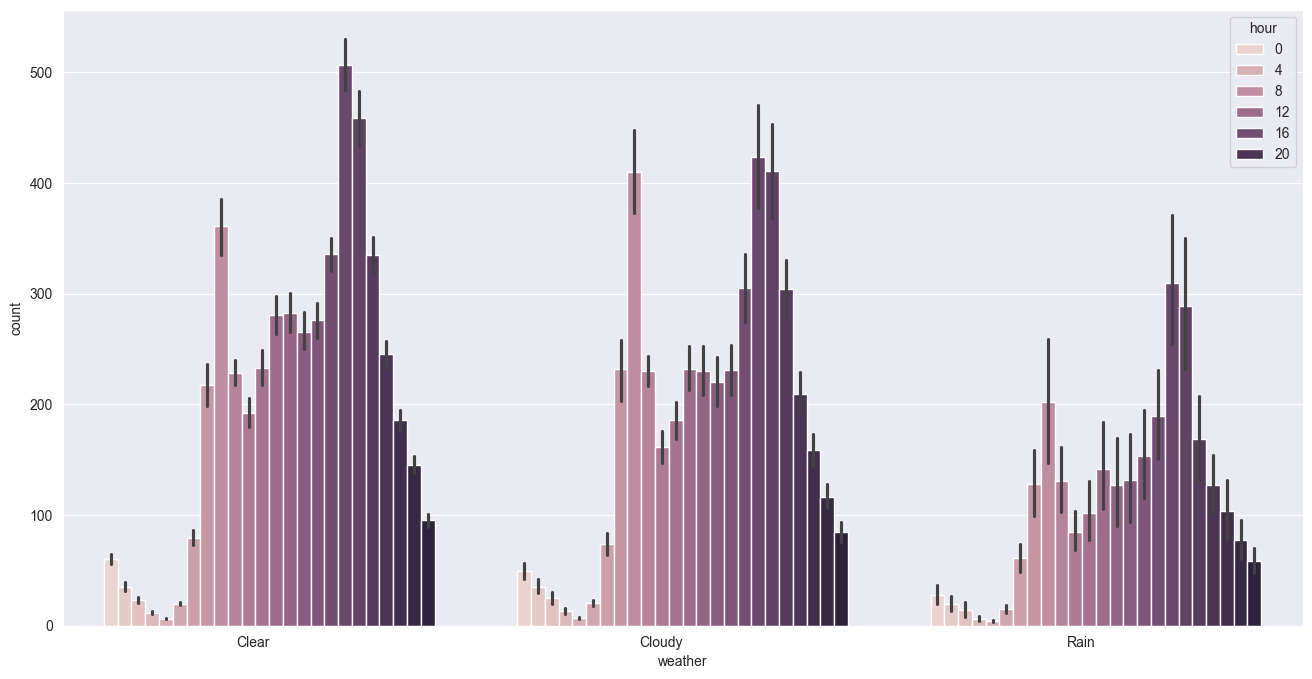

In [29]:
plt.figure(figsize=(16,8))
sns.set_style('darkgrid')
chart = sns.barplot(x = train['weather'], y = train['count'], hue= train['hour'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')

# Data preprocessing

In [65]:
# Dropping unnecessary features that are not needed for modeling or have minimal impact
train.drop(['datetime', 'atemp', 'windspeed', 'casual', 'registered'], axis=1, inplace=True)

### Encoding and scalling the data

In [66]:
# One hot Endocing .
train = pd.get_dummies(train, columns=['season', 'weather', 'month', 'day'])

# Label Encoding.
label_encoder = LabelEncoder()

for i in ['holiday', 'workingday', 'year']:
    train[i] = label_encoder.fit_transform(train[i])

In [67]:
# List of columns to scale
columns_to_scale = ['temp', 'humidity', 'hour']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the StandardScaler on the selected columns to calculate mean and standard deviation
scaler.fit(train[columns_to_scale])

# Transform the selected columns using the calculated mean and standard deviation
train[columns_to_scale] = scaler.transform(train[columns_to_scale])


### Split the data

In [68]:
# Split data into x and y.
X = train.drop("count", axis=1)
y = train["count"]

# Split train data into train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling

In [69]:
# Define the Root Mean Squared Logarithmic Error (RMSLE) scorer
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, np.clip(y_pred, 0, None)))

# Make the RMSLE scorer
rmsle_scorer = make_scorer(rmsle)

We use the Root Mean Squared Logarithmic Error (RMSLE) to evaluate the model's performance. RMSLE is a popular metric for regression tasks, as it penalizes both underestimation and overestimation of the target variable. For predicting bike rental counts, a lower RMSLE means the model's predictions are closer to the actual values.

In [70]:
# Initialize and evaluate different regression models using cross-validation
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

In [71]:
# Iterate over each model and Perform cross-validation with RMSLE scorer
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, scoring=rmsle_scorer, cv=5)
    
    print(f"Model: {model_name}")
    print(f"Average RMSLE: {np.mean(cv_scores)}\n")

Model: Linear Regression
Average RMSLE: 1.3043926351152915

Model: Decision Tree
Average RMSLE: 0.42552581923978944

Model: Random Forest
Average RMSLE: 0.3354860369590015



After evaluating multiple regression models, we found that the Random Forest algorithm demonstrated the best performance based on the RMSLE metric. Therefore, we selected the Random Forest model to make predictions on our test data. 

In [72]:
# Fit and evaluate the best model on the test set
the_model = RandomForestRegressor()  
the_model.fit(X_train, y_train)

y_pred = the_model.predict(X_test)
test_rmsle = rmsle(y_test, y_pred)
print(f"Test RMSLE for the best model: {test_rmsle}")

Test RMSLE for the best model: 0.32550074067704216


# Preperation the test data

In [98]:
# Seeing if there are dublicated.
test.duplicated().sum()

0

In [99]:
# seeing if there are null values.
test.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [100]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [117]:
# Convert the 'datetime' column to datetime format
test['datetime'] = pd.to_datetime(test['datetime'])

# Extract the year from the 'datetime' column and create a new 'year' column
test['year'] = test['datetime'].dt.year

# Extract the month as its name from the 'datetime' column and create a new 'month' column
test['month'] = test['datetime'].dt.month_name()

# Extract the day as its name from the 'datetime' column and create a new 'day' column
test['day'] = test['datetime'].dt.day_name()

# Extract the hour from the 'datetime' column and create a new 'hour' column
test['hour'] = test['datetime'].dt.hour

In [114]:
# Replace the values in the 'season' column with corresponding strings
test['season'].replace({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'}, inplace=True)

# Replace the values in the 'holiday' column with corresponding strings
test['holiday'].replace({1: 'Holiday', 0: 'Not Holiday'}, inplace=True)

# Replace the values in the 'workingday' column with corresponding strings
test['workingday'].replace({1: 'Workingday', 0: 'Not Workingday'}, inplace=True)

# Replace the values in the 'weather' column with corresponding strings
test['weather'].replace({1: 'Clear', 2: 'Cloudy', 3: 'Rain', 4: 'Snow'}, inplace=True)

test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,Winter,Not Holiday,Workingday,Clear,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,Winter,Not Holiday,Workingday,Clear,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,Winter,Not Holiday,Workingday,Clear,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,Winter,Not Holiday,Workingday,Clear,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,Winter,Not Holiday,Workingday,Clear,10.66,12.880,56,11.0014


In [118]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,2011-01-20 00:00:00,Winter,Not Holiday,Workingday,Clear,10.66,11.365,56,26.0027,2011,January,Thursday,0
1,2011-01-20 01:00:00,Winter,Not Holiday,Workingday,Clear,10.66,13.635,56,0.0000,2011,January,Thursday,1
2,2011-01-20 02:00:00,Winter,Not Holiday,Workingday,Clear,10.66,13.635,56,0.0000,2011,January,Thursday,2
3,2011-01-20 03:00:00,Winter,Not Holiday,Workingday,Clear,10.66,12.880,56,11.0014,2011,January,Thursday,3
4,2011-01-20 04:00:00,Winter,Not Holiday,Workingday,Clear,10.66,12.880,56,11.0014,2011,January,Thursday,4


In [116]:
# Define a mapping dictionary to combine the clusters
cluster_mapping = {"Snow" : "Rain"}

# Update the "grade" column with the new cluster labels
test['weather'] = test['weather'].replace(cluster_mapping)

In [119]:
# Numerical columns.
numerical_features = test[['temp', 'atemp', 'humidity', 'windspeed']]

# calculate descriptive statistics for numerical values.
numerical_features.describe()

,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000
mean,20.620607,24.012865,64.125212,12.631157
std,8.059583,8.782741,19.293391,8.250151
min,0.820000,0.000000,16.000000,0.000000
25%,13.940000,16.665000,49.000000,7.001500
50%,21.320000,25.000000,65.000000,11.001400
75%,27.060000,31.060000,81.000000,16.997900
max,40.180000,50.000000,100.000000,55.998600


In [120]:
# Replace zero 'windspeed' with the values above or below
test['windspeed'] = test['windspeed'].replace(0, method='ffill').replace(0, method='bfill')

/var/folders/t8/b35g9qgj44lc2lk1cvtblc5w0000gp/T/ipykernel_83299/1465471323.py:2: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  test['windspeed'] = test['windspeed'].replace(0, method='ffill').replace(0, method='bfill')


In [121]:
#Store the datetime column in a separate variable.
datetime = test['datetime']

In [122]:
test.drop(['datetime', 'atemp', 'windspeed'], axis=1, inplace=True)

In [123]:
test.head()

,season,holiday,workingday,weather,temp,humidity,year,month,day,hour
0,Winter,Not Holiday,Workingday,Clear,10.66,56,2011,January,Thursday,0
1,Winter,Not Holiday,Workingday,Clear,10.66,56,2011,January,Thursday,1
2,Winter,Not Holiday,Workingday,Clear,10.66,56,2011,January,Thursday,2
3,Winter,Not Holiday,Workingday,Clear,10.66,56,2011,January,Thursday,3
4,Winter,Not Holiday,Workingday,Clear,10.66,56,2011,January,Thursday,4


In [124]:
# One hot Endocing .
test = pd.get_dummies(test, columns=['season', 'weather', 'month', 'day'])

# Label Encoding.
label_encoder = LabelEncoder()

for i in ['holiday', 'workingday', 'year']:
    test[i] = label_encoder.fit_transform(test[i])

In [125]:
# List of columns to scale
columns_to_scale = ['temp', 'humidity', 'hour']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the StandardScaler on the selected columns to calculate mean and standard deviation
scaler.fit(test[columns_to_scale])

# Transform the selected columns using the calculated mean and standard deviation
test[columns_to_scale] = scaler.transform(test[columns_to_scale])


# Prediction and Submissiom

In [127]:
# Generate predictions for the test data using RandomForestClassifier.
test_pred = the_model.predict(test)

array([ 11.99,   3.2 ,   3.53, ..., 124.06,  96.41,  55.67])

In [132]:
# Create a submission DataFrame with the 'datetime' column and predicted rental counts.
submission = pd.DataFrame({'datetime': datetime, 'count': test_pred})


In [133]:
# Save the submission DataFrame as a CSV file without including the index column.
submission.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# Conclusion

Our journey of data preparation and analysis has yielded significant insights and successful model utilization. We embarked on a meticulous process of refining the dataset, including datetime format conversion, categorical value replacements, and addressing anomalies in variables like humidity and wind speed. This foundational work set the stage for more accurate analysis and model training.

Through exploratory data analysis, we unveiled crucial trends and patterns. Notably, we observed that weekdays outshine weekends and holidays in bike rental counts, and specific peak hours consistently attract more rentals.

Upon model evaluation, the Random Forest algorithm demonstrated remarkable prowess by achieving the lowest RMSLE score. 

To sum up, our journey encompassed data refinement, insightful analysis, meticulous model selection, and comprehensive utilization of predictions. This endeavor equips us with valuable information for strategic decision-making.